In [ ]:
import json
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gg_total = 7
gg_quorum = 5

In [ ]:
# code to read in and parse data

all_data = {}

ggp_file = '/content/drive/MyDrive/IW-F24/gcp-data/ggp_ips.json'
ggf_file = '/content/drive/MyDrive/IW-F24/gcp-data/ggf_ips.json'

with open(ggp_file, 'r') as file:
    ggp_data = json.load(file)
with open(ggf_file, 'r') as file:
    ggf_data = json.load(file)

num_nodes = len(ggf_data)

print(num_nodes)



32


In [ ]:
# ANALYZE
ggp_analyzed = {}
ggp_avg = 0
ggp_ips = set()
vote_counts = {vote: 0 for vote in range(8)}

help = {}
zeros = {}

for victim in ggp_data:
  zero_count = 0
  zero_list = []
  for adversary in ggp_data[victim]:
    string1 = victim + "_" + adversary
    string2 = adversary + "_" + victim
    count = len(ggp_data[victim][adversary])
    if(string1 in help) and (string2 in help):
      help[string1] += count
      help[string2] += count
    else:
      help[string1] = count
      help[string2] = count
    vote_counts[count] += 1
    if (count == 0):
      zero_count += 1
      zero_list.append(adversary)
    # update list of ips
    for ip in ggp_data[victim][adversary]:
      ggp_ips.add(ip)
  if(zero_count > 0):
    zeros[victim] = [zero_count, zero_list]
    print("victim: " + victim)
    # number of successful attacks under quorum of 7
    print(str(zero_count))
    # adversaries for those attacks
    print(str(zero_list))
    print("---------------------------")

print(len(zeros))

print(zeros)

print("---------------------------")
print("unsuccessful attacks and their total responding vps:")
for index, (key, value) in enumerate(help.items()):
    if(value != 7):
      if index % 2 == 0:
        print(str(key) + ": " + str(value))


victim: ariamsterdam
2
['arimadrid', 'ariparis']
---------------------------
victim: ariatlanta
5
['arilosangeles', 'arimiami', 'arinewjersey', 'ariseattle', 'aritoronto']
---------------------------
victim: aribangalore
27
['ariamsterdam', 'ariatlanta', 'arichicago', 'aridallas', 'arifrankfurt', 'arijohannesburg', 'arilondon', 'arilosangeles', 'arimadrid', 'arimanchester', 'arimelbourne', 'arimexicocity', 'arimiami', 'arimumbai', 'arinewjersey', 'ariosaka', 'ariparis', 'ariseattle', 'ariseoul', 'arisiliconvalley', 'arisingapore', 'aristockholm', 'arisydney', 'aritokyo', 'aritoronto', 'ariwarsaw', 'arisaopaulo']
---------------------------
victim: arichicago
11
['ariatlanta', 'arilondon', 'arimiami', 'arinewjersey', 'ariosaka', 'ariparis', 'arisiliconvalley', 'arisingapore', 'aristockholm', 'arisydney', 'ariwarsaw']
---------------------------
victim: aridallas
17
['ariatlanta', 'arifrankfurt', 'arijohannesburg', 'arilondon', 'arilosangeles', 'arimadrid', 'arimelbourne', 'arinewjersey'

In [ ]:
# create cdf of domain resilience for ggp setup
ggp_ips = set()
vote_counts = {vote: 0 for vote in range(8)}
ggp_analyzed = {quorum: [] for quorum in range(1, 8)}

for victim in ggp_data:
  node_res = 0
  all_quorums = {quorum: 0 for quorum in range(1,8)}
  for adversary in ggp_data[victim]:
    count = len(ggp_data[victim][adversary])
    vote_counts[count] += 1
    for quorum in range(1, 8):
      if(count > 7 - quorum):
        all_quorums[quorum] += 1
    # update list of ips
    for ip in ggp_data[victim][adversary]:
      ggp_ips.add(ip)
  all_quorums = {key: np.round(value / (num_nodes -1), 3) for key, value in all_quorums.items()}
  for quorum in range(1, 8):
    ggp_analyzed[quorum].append(all_quorums[quorum])



GTS Premium Tier: average resilience under various quorums
quorum of 1: 0.277
quorum of 2: 0.325
quorum of 3: 0.451
quorum of 4: 0.5
quorum of 5: 0.549
quorum of 6: 0.675
quorum of 7: 0.723

GTS Premium Tier: median resilience under various quorums
quorum of 1: 0.29
quorum of 2: 0.387
quorum of 3: 0.419
quorum of 4: 0.484
quorum of 5: 0.581
quorum of 6: 0.871
quorum of 7: 0.871


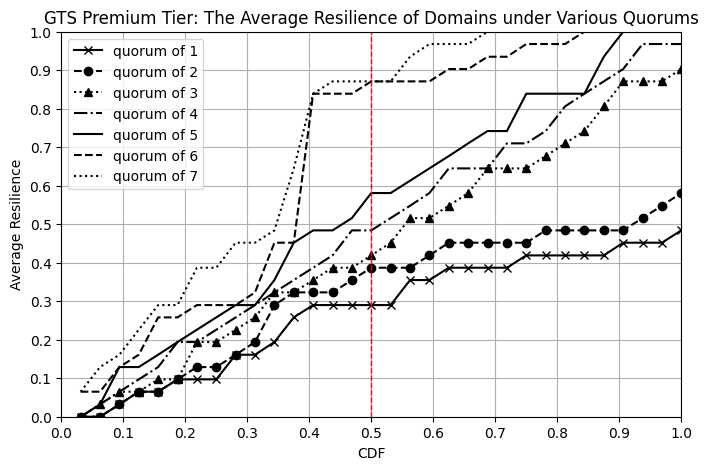

In [ ]:

# compute averages
ggp_avg = {quorum: 0 for quorum in range(1,8)}
print("GTS Premium Tier: average resilience under various quorums")
for quorum in range(1, 8):
  ggp_analyzed[quorum] = np.sort(ggp_analyzed[quorum])
  ggp_avg[quorum] = np.round(sum(ggp_analyzed[quorum]) / num_nodes, 3)
  print("quorum of " + str(quorum) +": " + str(ggp_avg[quorum]))

print()
# compute medians
med_index = int(num_nodes/2 - 1)
print("GTS Premium Tier: median resilience under various quorums")
for quorum in range(1, 8):
  print("quorum of " + str(quorum) +": " + str(ggp_analyzed[quorum][med_index]))

# create cdfs
ggp_cdf = {quorum: 0 for quorum in range(1,8)}

line_styles = ['-', '--', ':', '-.', '-', '--', ':']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
markers = ['x', 'o', '^', 'None', 'None', 'None', 'None']

plt.figure(figsize=(8, 5))


for quorum in range(1, 8):
  ggp_cdf[quorum] = np.arange(1, num_nodes + 1) / num_nodes
  plt.plot(ggp_cdf[quorum], ggp_analyzed[quorum], label=f'quorum of {quorum}', color='black', linestyle=line_styles[quorum-1], marker=markers[quorum-1])

plt.title("GTS Premium Tier: The Average Resilience of Domains under Various Quorums")
plt.ylabel('Average Resilience')
plt.xlabel('CDF')
plt.grid(True)

plt.legend()

# add vertical lines at certain percentile
#plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

55.443548387096776


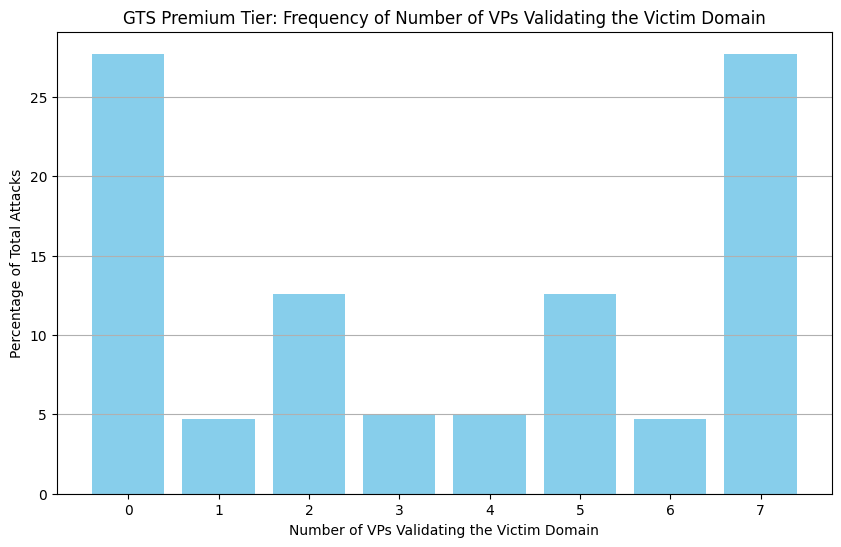

In [ ]:
# bar chart ggp

total = sum(vote_counts.values())
percent_data = {key: (value / total) * 100 for key, value in vote_counts.items()}
vote_same = percent_data[0] + percent_data[7]
print(vote_same)

x_values = list(percent_data.keys())
y_values = list(percent_data.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Number of VPs Validating the Victim Domain')
plt.ylabel('Percentage of Total Attacks')
plt.title('GTS Premium Tier: Frequency of Number of VPs Validating the Victim Domain')
plt.xticks(x_values)
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
# create cdf of domain resilience for ggf setup
ggf_ips = set()
vote_counts = {vote: 0 for vote in range(8)}
ggf_analyzed = {quorum: [] for quorum in range(1, 8)}

for victim in ggf_data:
  node_res = 0
  all_quorums = {quorum: 0 for quorum in range(1,8)}
  for adversary in ggf_data[victim]:
    count = len(ggf_data[victim][adversary])
    vote_counts[count] += 1
    for quorum in range(1, 8):
      if(count > 7 - quorum):
        all_quorums[quorum] += 1
    # update list of ips
    for ip in ggf_data[victim][adversary]:
      ggf_ips.add(ip)
  all_quorums = {key: np.round(value / (num_nodes -1), 3) for key, value in all_quorums.items()}
  for quorum in range(1, 8):
    ggf_analyzed[quorum].append(all_quorums[quorum])



GTS Standard Tier: average resilience under various quorums
quorum of 1: 0.307
quorum of 2: 0.333
quorum of 3: 0.465
quorum of 4: 0.5
quorum of 5: 0.535
quorum of 6: 0.667
quorum of 7: 0.694

GTS Standard Tier: median resilience under various quorums
quorum of 1: 0.387
quorum of 2: 0.387
quorum of 3: 0.419
quorum of 4: 0.484
quorum of 5: 0.516
quorum of 6: 0.839
quorum of 7: 0.871


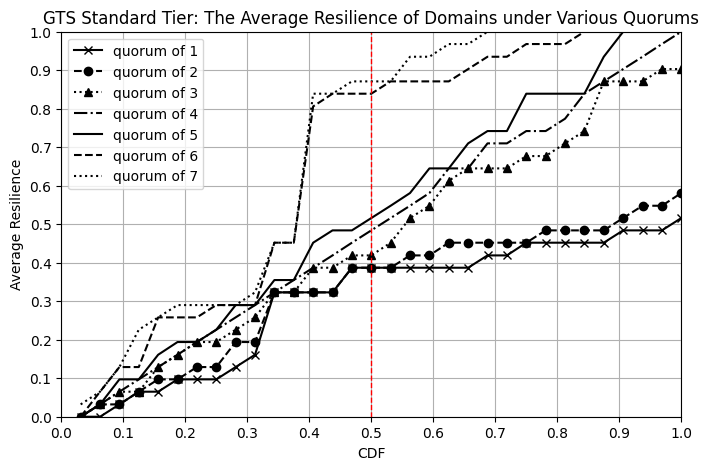

In [ ]:

# compute averages
ggf_avg = {quorum: 0 for quorum in range(1,8)}
print("GTS Standard Tier: average resilience under various quorums")
for quorum in range(1, 8):
  ggf_analyzed[quorum] = np.sort(ggf_analyzed[quorum])
  ggf_avg[quorum] = np.round(sum(ggf_analyzed[quorum]) / num_nodes, 3)
  print("quorum of " + str(quorum) +": " + str(ggf_avg[quorum]))

print()
# compute medians
med_index = int(num_nodes/2 - 1)
print("GTS Standard Tier: median resilience under various quorums")
for quorum in range(1, 8):
  print("quorum of " + str(quorum) +": " + str(ggf_analyzed[quorum][med_index]))

# create cdfs
ggf_cdf = {quorum: 0 for quorum in range(1,8)}

line_styles = ['-', '--', ':', '-.', '-', '--', ':']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
markers = ['x', 'o', '^', 'None', 'None', 'None', 'None']

plt.figure(figsize=(8, 5))


for quorum in range(1, 8):
  ggf_cdf[quorum] = np.arange(1, num_nodes + 1) / num_nodes
  plt.plot(ggf_cdf[quorum], ggf_analyzed[quorum], label=f'quorum of {quorum}', color='black', linestyle=line_styles[quorum-1], marker=markers[quorum-1])

plt.title("GTS Standard Tier: The Average Resilience of Domains under Various Quorums")
plt.ylabel('Average Resilience')
plt.xlabel('CDF')
plt.grid(True)

plt.legend()

# add vertical lines at certain percentile
#plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

61.29032258064516


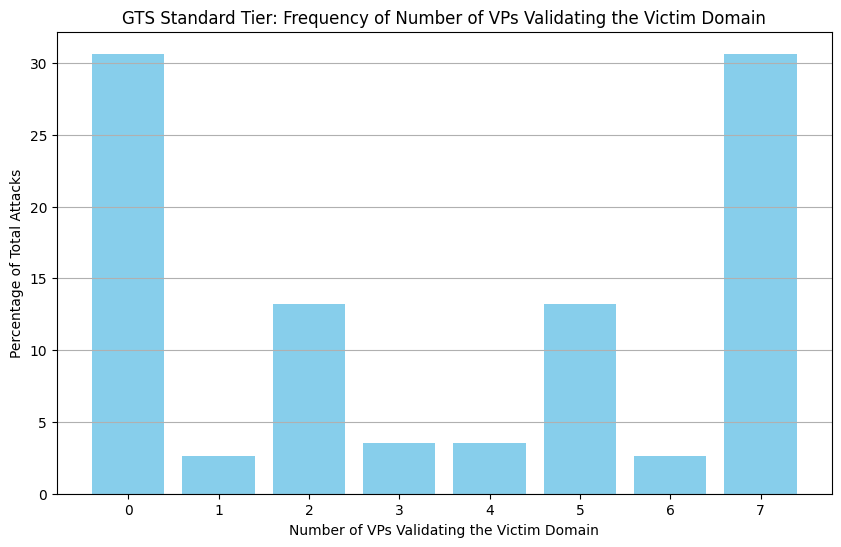

In [ ]:
# bar chart ggf

total = sum(vote_counts.values())
percent_data = {key: (value / total) * 100 for key, value in vote_counts.items()}
vote_same = percent_data[0] + percent_data[7]
print(vote_same)

x_values = list(percent_data.keys())
y_values = list(percent_data.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Number of VPs Validating the Victim Domain')
plt.ylabel('Percentage of Total Attacks')
plt.title('GTS Standard Tier: Frequency of Number of VPs Validating the Victim Domain')
plt.xticks(x_values)
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
# dictionary of ips and their location

geo_dict = {
    "35.211.239.179": "us-east",
    "35.209.87.57" : "us-central",
    "35.212.128.228": "us-west",
    "35.210.226.98": "europe-west",
    "35.217.9.53": "europe-north",
    "35.206.237.180": "asia-east",
    "35.213.170.66" : "asia-southeast",
    "34.75.246.52": "us-east",
    "34.171.228.132": "us-central",
    "34.83.63.223": "us-west",
    "34.140.35.230": "europe-west",
    "34.88.225.17": "europe-north",
    "35.221.197.15": "asia-east",
    "35.185.188.182" : "asia-southeast"
}

In [ ]:
# create pairwise matrix of le vantage points to analyze similar routing behaviors
from itertools import combinations

ip_index = {ip: i for i, ip in enumerate(ggp_ips)}
num_ips = len(ip_index)
matrix = np.zeros((num_ips, num_ips), dtype=int)

for victim in ggp_data:
  for adversary in ggp_data[victim]:
      # count pairs of ips that routed to victim
      victim_indices = [ip_index[ip] for ip in ggp_data[victim][adversary]]
      for i, j in combinations(victim_indices, 2):
        matrix[i][j] += 1
        matrix[j][i] += 1

    # count pairs of ips that routed to adversary
      attacker_indices = [ip for ip in range(num_ips) if ip not in victim_indices]
      for i, j in combinations(attacker_indices, 2):
        matrix[i][j] += 1
        matrix[j][i] += 1

print("GTS Premium Tier: Pairwise Similarity Matrix for VP Locations")
location_index = {geo_dict[ip]: i for i, ip in enumerate(ggp_ips)}
print(location_index)
matrix = np.round(matrix.astype(float) / ((num_nodes) * (num_nodes - 1)), 2)
print(matrix)




GTS Premium Tier: Pairwise Similarity Matrix for VP Locations
{'us-west': 0, 'us-east': 1, 'asia-southeast': 2, 'europe-north': 3, 'us-central': 4, 'asia-east': 5, 'europe-west': 6}
[[0.   0.88 0.84 0.76 0.93 0.84 0.79]
 [0.88 0.   0.75 0.75 0.88 0.76 0.78]
 [0.84 0.75 0.   0.65 0.79 1.   0.68]
 [0.76 0.75 0.65 0.   0.76 0.66 0.96]
 [0.93 0.88 0.79 0.76 0.   0.79 0.79]
 [0.84 0.76 1.   0.66 0.79 0.   0.69]
 [0.79 0.78 0.68 0.96 0.79 0.69 0.  ]]


In [ ]:

ip_index = {ip: i for i, ip in enumerate(ggf_ips)}
num_ips = len(ip_index)
matrix = np.zeros((num_ips, num_ips), dtype=int)

for victim in ggf_data:
  for adversary in ggf_data[victim]:
      # count pairs of ips that routed to victim
      victim_indices = [ip_index[ip] for ip in ggf_data[victim][adversary]]
      for i, j in combinations(victim_indices, 2):
        matrix[i][j] += 1
        matrix[j][i] += 1

    # count pairs of ips that routed to adversary
      attacker_indices = [ip for ip in range(num_ips) if ip not in victim_indices]
      for i, j in combinations(attacker_indices, 2):
        matrix[i][j] += 1
        matrix[j][i] += 1

print("GTS Standard Tier: Pairwise Similarity Matrix for VP Locations")
location_index = {geo_dict[ip]: i for i, ip in enumerate(ggp_ips)}
print(location_index)
matrix = np.round(matrix.astype(float) / ((num_nodes) * (num_nodes - 1)), 2)
print(matrix)

GTS Standard Tier: Pairwise Similarity Matrix for VP Locations
{'us-west': 0, 'us-east': 1, 'asia-southeast': 2, 'europe-north': 3, 'us-central': 4, 'asia-east': 5, 'europe-west': 6}
[[0.   0.81 0.84 0.79 0.66 1.   0.69]
 [0.81 0.   0.95 0.97 0.8  0.81 0.82]
 [0.84 0.95 0.   0.94 0.76 0.84 0.79]
 [0.79 0.97 0.94 0.   0.8  0.79 0.83]
 [0.66 0.8  0.76 0.8  0.   0.66 0.95]
 [1.   0.81 0.84 0.79 0.66 0.   0.69]
 [0.69 0.82 0.79 0.83 0.95 0.69 0.  ]]
